#Delhivery - Business Case Study

###Introduction:
Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating the commerce operating system. They achieve this by utilizing world-class infrastructure, ensuring the highest quality in logistics operations, and harnessing cutting-edge engineering and technology capabilities.

####Why this case study?
From Delhivery’s Perspective:

*   Delhivery aims to establish itself as the premier player in the logistics industry. This case study is of paramount importance as it aligns with the company's core objectives and operational excellence.
*   It provides a practical framework for understanding and processing data, which is integral to their operations. By leveraging data engineering pipelines and data analysis techniques, Delhivery can achieve several critical goals.
*   First, it allows them to ensure data integrity and quality by addressing missing values and structuring the dataset appropriately.
*   Second, it enables the extraction of valuable features from raw data, which can be utilized for building accurate forecasting models.
*   Moreover, it facilitates the identification of patterns, insights, and actionable recommendations crucial for optimizing their logistics operations.
*   By conducting hypothesis testing and outlier detection, Delhivery can refine their processes and further enhance the quality of service they provide.

From Learners' Perspective:

*   Learners will gain hands-on experience in data preprocessing and cleaning, which is often the most time-consuming aspect of data analysis.
*   Feature engineering is a critical step in building machine learning models. In this case study, learners will understand how to extract meaningful features from raw data, including datetime manipulation and column splitting.
*   The case study introduces learners to the concept of grouping data based on specific keys and then aggregating it. This is a key aspect of data analysis, especially when dealing with time-series data or data with a hierarchical structure.
*   Learners will perform hypothesis testing, to validate assumptions and draw insights from data.
*   The case study goes beyond data analysis by focusing on deriving actionable insights for a business. Learners will understand how data analysis can drive informed decision-making and recommendations.
_________________________________________________

###Column Profiling:

1. data - tells whether the data is testing or training data
2. trip_creation_time – Timestamp of trip creation
3. route_schedule_uuid – Unique ID for a particular route schedule
4. route_type – Transportation type
a. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck
is making no other pickups or drop-offs along the way
b. Carting: Handling system consisting of small vehicles (carts)
5. trip_uuid - Unique ID given to a particular trip (A trip may include different source and
destination centers)
6. source_center - Source ID of trip origin
7. source_name - Source Name of trip origin
8. destination_cente – Destination ID
9. destination_name – Destination Name
10. od_start_time – Trip start time
11. od_end_time – Trip end time
12. start_scan_to_end_scan – Time taken to deliver from source to destination
13. is_cutoff – Unknown field
14. cutoff_factor – Unknown field
15. cutoff_timestamp – Unknown field
16. actual_distance_to_destination – Distance in kms between source and destination
warehouse
17. actual_time – Actual time taken to complete the delivery (Cumulative)
18. osrm_time – An open-source routing engine time calculator which computes the
shortest path between points in a given map (Includes usual traffic, distance through
major and minor roads) and gives the time (Cumulative)
19. osrm_distance – An open-source routing engine which computes the shortest path
between points in a given map (Includes usual traffic, distance through major and minor
roads) (Cumulative)
20. factor – Unknown field
21. segment_actual_time – This is a segment time. Time taken by the subset of the
package delivery
22. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the
package delivery
23. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of
the package delivery
24. segment_factor – Unknown field
______________________________________

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel,chi2_contingency,chisquare,f_oneway
from scipy.stats import kruskal,shapiro,levene
import warnings
warnings.filterwarnings('ignore')


In [257]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181 -O 'data.csv'

--2024-07-05 12:47:04--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.164.173.117, 18.164.173.18, 18.164.173.110, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.164.173.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]  53.04M   248MB/s    in 0.2s    

2024-07-05 12:47:04 (248 MB/s) - ‘data.csv’ saved [55617130/55617130]



In [258]:
df=pd.read_csv('data.csv')

####What does ‘good’ look like?
1. Basic data cleaning and exploration:
1. Handle missing values in the data.
2. Converting time columns into pandas datetime.
3. Analyze structure & characteristics of the dataset.

In [259]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [260]:
df=df.dropna(how='any')

In [261]:
df=df.reset_index(drop=True)

In [262]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff       

In [264]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,233.561345,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
std,1038.082976,345.245823,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,161.000000,22.000000,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,451.000000,66.000000,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,1645.000000,286.000000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


In [265]:
df.shape

(144316, 24)

In [266]:
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp']=pd.to_datetime(df['cutoff_timestamp'],format='mixed')

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  object        
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [268]:
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

####Try merging the rows using the hint mentioned below.
Since delivery details of one package is divided into several rows (think of it as connecting flights to reach a particular destination).

1. Grouping by segment

*   Create a unique identifier for different segments of a trip based on the combination of the trip_uuid, source_center, and destination_center and
name it as segment_key.
*   You can use inbuilt functions like groupby and aggregations like
cumsum() to merge the rows in columns segment_actual_time,
segment_osrm_distance, segment_osrm_time based on the
segment_key.
*   This way you’ll get new columns named segment_actual_time_sum,
segment_osrm_distance_sum, segment_osrm_time_sum.

2. Aggregating at segment level
*   Create a dictionary named create_segment_dict, that defines how to
aggregate and select values.

    i. You can keep the first and last values for some numeric/categorical fields if aggregating them won’t make sense.
*   Further group the data by segment_key because you want to perform
aggregation operations for different segments of each trip based on the
segment_key value.
*   The aggregation functions specified in the create_segment_dict are
applied to each group of rows with the same segment_key.
*   Sort the resulting DataFrame segment, by two criteria:
    i. First, it sorts by segment_key to ensure that segments are ordered consistently.
    ii. Second, it sorts by od_end_time in ascending order, ensuring that segments within the same trip are ordered by their end times from earliest to latest.

In [269]:
df['segment_key']=df['trip_uuid']+df['source_center']+df['destination_center']
df['segment_key']

0         trip-153741093647649320IND388121AAAIND388620AAB
1         trip-153741093647649320IND388121AAAIND388620AAB
2         trip-153741093647649320IND388121AAAIND388620AAB
3         trip-153741093647649320IND388121AAAIND388620AAB
4         trip-153741093647649320IND388121AAAIND388620AAB
                               ...                       
144311    trip-153746066843555182IND131028AABIND000000ACB
144312    trip-153746066843555182IND131028AABIND000000ACB
144313    trip-153746066843555182IND131028AABIND000000ACB
144314    trip-153746066843555182IND131028AABIND000000ACB
144315    trip-153746066843555182IND131028AABIND000000ACB
Name: segment_key, Length: 144316, dtype: object

In [270]:
segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()

df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144311,92.0,65.3487,94.0
144312,118.0,82.7212,115.0
144313,138.0,103.4265,149.0
144314,155.0,122.3150,176.0


In [271]:
create_segment_dict = {'data' : 'first',
    'trip_creation_time' : 'first', 'trip_uuid' : 'first',
    'route_schedule_uuid' : 'first', 'route_type' : 'first',
    'source_center' : 'first', 'source_name' : 'first',
    'destination_center' : 'last', 'destination_name' : 'last',
    'od_start_time' : 'first', 'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    'actual_distance_to_destination' : 'last', 'actual_time' : 'last',
    'osrm_time' : 'last', 'osrm_distance' : 'last',
    'cutoff_timestamp' : 'first', 'segment_actual_time' : 'sum', 'segment_osrm_time' : 'sum', 'segment_osrm_distance' : 'sum',
    'segment_actual_time_sum' : 'last', 'segment_osrm_distance_sum' : 'last', 'segment_osrm_time_sum' : 'last'}

In [272]:
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()

In [273]:
segment

,index,segment_key,data,trip_creation_time,trip_uuid,route_schedule_uuid,route_type,source_center,source_name,destination_center,...,actual_time,osrm_time,osrm_distance,cutoff_timestamp,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,trip-153671041653548748,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,732.0,329.0,446.5496,2018-09-13 12:40:43,728.0,534.0,670.6205,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,trip-153671041653548748,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,830.0,388.0,544.8027,2018-09-12 14:56:29,820.0,474.0,649.8528,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,trip-153671042288605164,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,47.0,26.0,28.1994,2018-09-12 02:41:24,46.0,26.0,28.1995,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,trip-153671042288605164,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,96.0,42.0,56.9116,2018-09-12 01:39:28,95.0,39.0,55.9899,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,trip-153671043369099517,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,611.0,212.0,281.2109,2018-09-14 16:54:36,608.0,231.0,317.7408,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,trip-153861115439069069,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,51.0,41.0,42.5213,2018-10-04 03:17:33,49.0,42.0,42.1431,49.0,42.1431,42.0
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,trip-153861115439069069,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,90.0,48.0,40.6080,2018-10-04 05:32:33,89.0,77.0,78.5869,89.0,78.5869,77.0
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,trip-153861115439069069,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,30.0,14.0,16.0185,2018-10-04 02:05:30,29.0,14.0,16.0184,29.0,16.0184,14.0
26220,26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,trip-153861118270144424,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,233.0,42.0,52.5303,2018-10-04 07:29:32,233.0,42.0,52.5303,233.0,52.5303,42.0


In [274]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26222 non-null  int64         
 1   segment_key                     26222 non-null  object        
 2   data                            26222 non-null  object        
 3   trip_creation_time              26222 non-null  object        
 4   trip_uuid                       26222 non-null  object        
 5   route_schedule_uuid             26222 non-null  object        
 6   route_type                      26222 non-null  object        
 7   source_center                   26222 non-null  object        
 8   source_name                     26222 non-null  object        
 9   destination_center              26222 non-null  object        
 10  destination_name                26222 non-null  object        
 11  od

In [359]:
segment['od_total_time'] = segment['od_end_time'] - segment['od_start_time']
segment['od_total_time'] = segment['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
segment['od_total_time']

0        1260.60
1         999.51
2          58.83
3         122.78
4         834.64
          ...   
26217      62.12
26218      91.09
26219      44.17
26220     287.47
26221      66.93
Name: od_total_time, Length: 26222, dtype: float64

In [412]:
average_time_per_trip=round((segment['od_total_time'].mean())/60,2)
print(f'Average time per trip : {average_time_per_trip} hours')

Average time per trip : 4.98 hours


####Feature Engineering:
Extract features from the below fields:
1. Calculate time taken between od_start_time and od_end_time and keep it as a
feature named od_time_diff_hour. Drop the original columns, if required.
2. Destination Name: Split and extract features out of destination. City-place-code (State)
3. Source Name: Split and extract features out of destination. City-place-code (State)
4. Trip_creation_time: Extract features like month, year, day, etc.


####In-depth analysis:
1. Grouping and Aggregating at Trip-level
    a. Groups the segment data by the trip_uuid column to focus on aggregating data at the trip level.
    b. Apply suitable aggregation functions like first, last, and sum specified in the create_trip_dict dictionary to calculate summary statistics for each trip.

In [361]:
create_trip_dict = {

    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'od_total_time' : 'sum','segment_actual_time' : 'sum', 'segment_osrm_time' : 'sum', 'segment_osrm_distance' : 'sum',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

}

In [362]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)

In [363]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,od_total_time,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_center,...,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,2260.11,1548.0,1008.0,1320.4733,IND209304AAA,...,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,181.61,141.0,65.0,84.1894,IND561203AAB,...,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,3934.36,3308.0,1941.0,2545.2678,IND000000ACB,...,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,100.49,59.0,16.0,19.8766,IND400072AAB,...,IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,718.34,340.0,115.0,146.7919,IND583101AAA,...,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,258.03,82.0,62.0,64.8551,IND160002AAC,...,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,60.59,21.0,11.0,16.0883,IND121004AAB,...,IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,422.12,281.0,88.0,104.8866,IND208006AAA,...,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,348.52,258.0,221.0,223.5324,IND627005AAA,...,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


In [364]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            14787 non-null  object 
 1   trip_creation_time              14787 non-null  object 
 2   route_schedule_uuid             14787 non-null  object 
 3   route_type                      14787 non-null  object 
 4   trip_uuid                       14787 non-null  object 
 5   od_total_time                   14787 non-null  float64
 6   segment_actual_time             14787 non-null  float64
 7   segment_osrm_time               14787 non-null  float64
 8   segment_osrm_distance           14787 non-null  float64
 9   source_center                   14787 non-null  object 
 10  source_name                     14787 non-null  object 
 11  destination_center              14787 non-null  object 
 12  destination_name                

Destination Name: Split and extract features out of destination. City-place-code
(State)

Source Name: Split and extract features out of destination. City-place-code
(State)

Trip_creation_time: Extract features like month, year, day, etc.


In [281]:
def location_name_to_city(x):
  if 'location' in x:
    return 'unknown_city'
  else:
    l = x.split()[0].split('_')
    if 'CCU' in x:
      return 'Kolkata'
    elif 'MAA' in x.upper():
      return 'Chennai'
    elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
      return 'Bengaluru'
    elif 'FBD' in x.upper():
      return 'Faridabad'
    elif 'BOM' in x.upper():
      return 'Mumbai'
    elif 'DEL' in x.upper():
      return 'Delhi'
    elif 'OK' in x.upper():
      return 'Delhi'
    elif 'GZB' in x.upper():
      return 'Ghaziabad'
    elif 'GGN' in x.upper():
      return 'Gurgaon'
    elif 'AMD' in x.upper():
      return 'Ahmedabad'
    elif 'CJB' in x.upper():
      return 'Coimbatore'
    elif 'HYD' in x.upper():
      return 'Hyderabad'
    return l[0]

In [282]:
def location_name_to_place(x):
  if 'location' in x:
    return x
  elif 'HBR' in x:
    return 'HBR Layout PC'
  else:
    l = x.split()[0].split('_', 1)
    if len(l) == 1:
      return 'unknown_place'
    else:
      return l[1]

In [283]:
def location_name_to_state(x):
  l = x.split('(')
  if len(l) == 1:
    return l[0]
  else:
    return l[1].replace(')', "")

In [369]:
trip['source_state'] = trip['source_name'].apply(location_name_to_state)
print('No of source states :', trip['source_state'].nunique())
trip['source_state'].unique()

No of source states : 29


array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland'],
      dtype=object)

In [370]:
trip['source_city'] = trip['source_name'].apply(location_name_to_city)
print('No of source cities :', trip['source_city'].nunique())
trip['source_city'].unique()[:50]

No of source cities : 687


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat'],
      dtype=object)

In [371]:
trip['source_place'] = trip['source_name'].apply(location_name_to_place)
print('No of source places :', trip['source_place'].nunique())
trip['source_place'].unique()[:50]

No of source places : 755


array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North', 'KndliDPP_D', 'Central_D_9',
       'DavkharRd_D', 'Bandel_D', 'RTCStand_D', 'Central_DPP_1',
       'KGAirprt_HB', 'North_D_2', 'Central_D_1', 'DC', 'Mthurard_L',
       'Mullanpr_DC', 'Central_DPP_2', 'RajCmplx_D', 'Beliaghata_DPC',
       'RjnaiDPP_D', 'AbbasNgr_I', 'Mankoli_HB', 'DPC', 'Airport_H',
       'Hub', 'Gateway_HB', 'Tathawde_H', 'ChotiHvl_DC', 'Trmltmpl_D',
       'OnkarDPP_D', 'Mehmdpur_H', 'KaranNGR_D', 'Sohagpur_D',
       'Chrompet_L'], dtype=object)

In [372]:
trip['destination_state'] = trip['destination_name'].apply(location_name_to_state)
print('No of destination states :', trip['destination_state'].nunique())
trip['destination_state'].unique()

No of destination states : 31


array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Madhya Pradesh', 'Assam', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Dadra and Nagar Haveli', 'Orissa',
       'Bihar', 'Jharkhand', 'Goa', 'Uttarakhand', 'Himachal Pradesh',
       'Kerala', 'Arunachal Pradesh', 'Mizoram', 'Chhattisgarh',
       'Jammu & Kashmir', 'Nagaland', 'Meghalaya', 'Tripura',
       'Daman & Diu'], dtype=object)

In [373]:
trip['destination_city'] = trip['destination_name'].apply(location_name_to_city)
print('No of destination cities :', trip['destination_city'].nunique())
trip['destination_city'].unique()[:50]

No of destination cities : 805


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Sandur', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'PNQ', 'Faridabad', 'Ratnagiri',
       'Bangalore', 'Hyderabad', 'Aland', 'Jaipur', 'Satna', 'Guwahati',
       'Bareli', 'Nashik', 'Hooghly', 'Sivasagar', 'Palani', 'Jalandhar',
       'Chandigarh', 'Yavatmal', 'Sangola', 'Kolkata', 'Savner',
       'Kurnool', 'Bhatinda', 'Bhiwandi', 'Barnala', 'Murbad', 'Kadaba',
       'Gulbarga', 'Naraingarh', 'Ludhiana', 'Kadi', 'Jabalpur',
       'Gangakher', 'Bankura', 'Silvassa', 'Porbandar', 'Jetpur',
       'Khammam', 'Mehsana', 'Katni', 'Una', 'Malavalli'], dtype=object)

In [374]:
trip['destination_place'] = trip['destination_name'].apply(location_name_to_place)
print('No of destination places :', trip['destination_place'].nunique())
trip['destination_place'].unique()[:50]

No of destination places : 843


array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'MiraRd_IP',
       'WrdN1DPP_D', 'Poonamallee', 'Vandalur_Dc', 'HBR Layout PC',
       'Central_D_3', 'Bhogal', 'unknown_place', 'MjgaonRd_D',
       'Nelmngla_H', 'Uppal_I', 'RazaviRd_D', 'Central_I_7',
       'Central_I_2', 'Hub', 'SourvDPP_D', 'Varachha_DC', 'TgrniaRD_I',
       'DC', 'Gokulam_D', 'Babupaty_D', 'Bomsndra_HB', 'Alwal_I',
       'RjndraRd_D', 'Mehmdpur_H', 'Sanpada_I', 'JajuDPP_D',
       'Central_DPP_2', 'Dankuni_HB', 'Wagodha_D', 'AbbasNgr_I',
       'Balabhgarh_DPC', 'DPC', 'Mankoli_HB', 'Shamshbd_H', 'SnkunDPP_D',
       'Kharar_DC', 'AnugrDPP_D', 'Nehrugnj_I', 'Ward2DPP_D',
       'MilrGanj_HB', 'KaranNGR_D', 'Adhartal_IP', 'Poonamallee_HB',
       'Busstand_D', 'BhowmDPP_D', 'Samrvrni_D'], dtype=object)

In [290]:
trip['trip_creation_time']=pd.to_datetime(trip['trip_creation_time'])

In [291]:
trip['trip_creation_date'] = pd.to_datetime(trip['trip_creation_time'].dt.date)
trip['trip_creation_date'].head()

0   2018-09-12
1   2018-09-12
2   2018-09-12
3   2018-09-12
4   2018-09-12
Name: trip_creation_date, dtype: datetime64[ns]

In [292]:
trip['trip_creation_day'] = trip['trip_creation_time'].dt.day
trip['trip_creation_day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3], dtype=int32)

In [293]:
trip['trip_creation_month'] = trip['trip_creation_time'].dt.month
trip['trip_creation_month'].unique()

array([ 9, 10], dtype=int32)

In [294]:
trip['trip_creation_year'] = trip['trip_creation_time'].dt.year
trip['trip_creation_year'].unique()

array([2018], dtype=int32)

In [295]:
trip['trip_creation_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_creation_week'].head()

0    37
1    37
2    37
3    37
4    37
Name: trip_creation_week, dtype: UInt32

In [296]:
trip['trip_creation_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_creation_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [297]:
trip.shape

(14787, 34)

In [365]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            14787 non-null  object 
 1   trip_creation_time              14787 non-null  object 
 2   route_schedule_uuid             14787 non-null  object 
 3   route_type                      14787 non-null  object 
 4   trip_uuid                       14787 non-null  object 
 5   od_total_time                   14787 non-null  float64
 6   segment_actual_time             14787 non-null  float64
 7   segment_osrm_time               14787 non-null  float64
 8   segment_osrm_distance           14787 non-null  float64
 9   source_center                   14787 non-null  object 
 10  source_name                     14787 non-null  object 
 11  destination_center              14787 non-null  object 
 12  destination_name                

In [375]:
trip.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'od_total_time', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'source_center',
       'source_name', 'destination_center', 'destination_name',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time_sum',
       'segment_osrm_distance_sum', 'segment_osrm_time_sum', 'source_state',
       'source_city', 'source_place', 'destination_state', 'destination_city',
       'destination_place'],
      dtype='object')

In [366]:
trip.describe(include='object').T

,count,unique,top,freq
data,14787,2,training,10645
trip_creation_time,14787,14787,2018-09-12 00:00:16.535741,1
route_schedule_uuid,14787,1497,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,53
route_type,14787,2,Carting,8906
trip_uuid,14787,14787,trip-153671041653548748,1
source_center,14787,930,IND000000ACB,1052
source_name,14787,930,Gurgaon_Bilaspur_HB (Haryana),1052
destination_center,14787,1035,IND000000ACB,821
destination_name,14787,1035,Gurgaon_Bilaspur_HB (Haryana),821


In [367]:
trip.describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14787.0,530.313468,658.415416,23.460000,149.695000,279.710000,633.535000,7898.550000
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,160.990938,271.459495,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14787.0,203.887411,370.565564,9.072900,30.756900,65.302800,206.644200,2840.081000
segment_actual_time_sum,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000


###Bi-variate and Multi-variate Analysis

In [301]:
trip['trip_creation_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [302]:
trip_hour = trip.groupby(by = 'trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()
trip_hour.head()

,trip_creation_hour,trip_uuid
0,0,991
1,1,748
2,2,702
3,3,651
4,4,635


[]

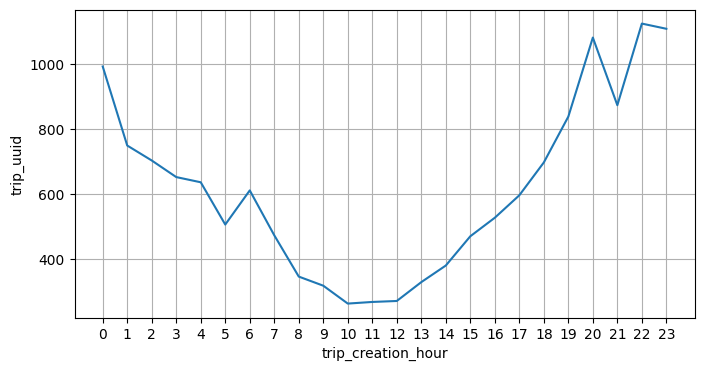

In [303]:
plt.figure(figsize = (8, 4))
sns.lineplot(data = trip_hour, x = trip_hour['trip_creation_hour'], y = trip_hour['trip_uuid'])
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.plot()

In [304]:
trip_day = trip.groupby(by = 'trip_creation_day')['trip_uuid'].count().to_frame().reset_index()
trip_day.head()

,trip_creation_day,trip_uuid
0,1,600
1,2,549
2,3,627
3,12,747
4,13,750


[]

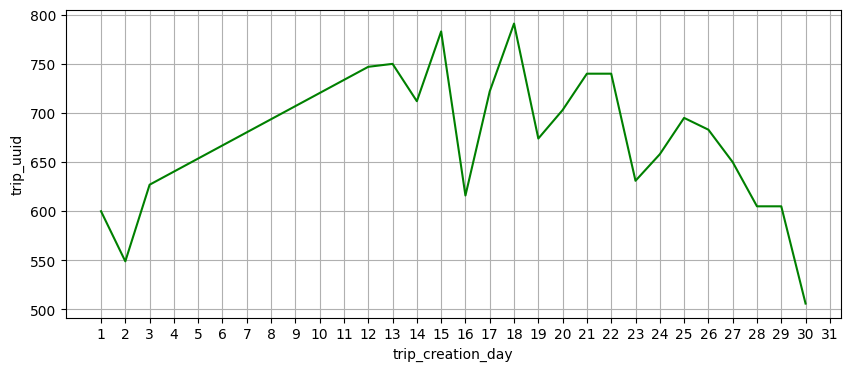

In [305]:
plt.figure(figsize = (10, 4))
sns.lineplot(data = trip_day, x = trip_day['trip_creation_day'], y = trip_day['trip_uuid'],color='green')
plt.xticks(np.arange(1,32))
plt.grid('both')
plt.plot()

In [306]:
trip_week = trip.groupby(by = 'trip_creation_week')['trip_uuid'].count().to_frame().reset_index()
trip_week.head()

,trip_creation_week,trip_uuid
0,37,3608
1,38,5001
2,39,4402
3,40,1776


[]

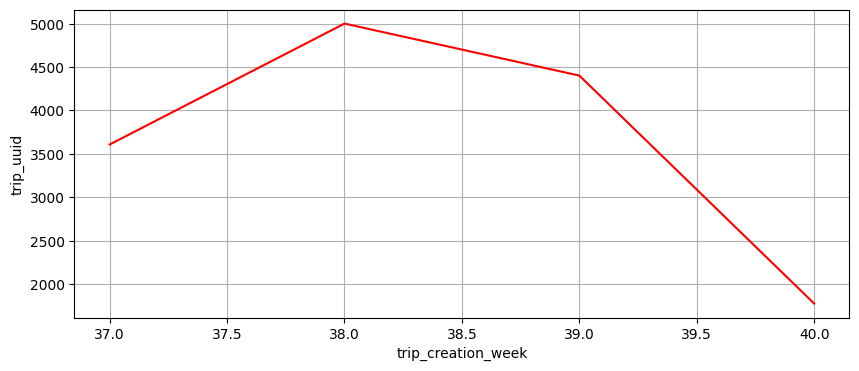

In [307]:
plt.figure(figsize = (10, 4))
sns.lineplot(data = trip_week, x = trip_week['trip_creation_week'], y = trip_week['trip_uuid'],color='red')
plt.grid('both')
plt.plot()

In [308]:
trip_month = trip.groupby('trip_creation_month')['trip_uuid'].count().to_frame().reset_index()
trip_month['percentage'] = np.round(trip_month['trip_uuid'] * 100/ trip_month['trip_uuid'].sum(), 2)
trip_month.head()

,trip_creation_month,trip_uuid,percentage
0,9,13011,87.99
1,10,1776,12.01


[]

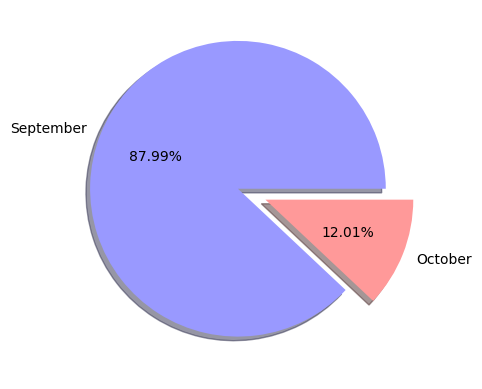

In [309]:
plt.pie(x = trip_month['trip_uuid'], labels = ['September', 'October'], explode = [0.1, 0.1],shadow=True, autopct = '%.2f%%',colors=['#9999ff','#ff9999'])
plt.plot()

In [310]:
trip_source_state = trip.groupby(by = 'source_state')['trip_uuid'].count().to_frame().reset_index()
trip_source_state['percentage'] = np.round(trip_source_state['trip_uuid'] * 100/ trip_source_state['trip_uuid'].sum(), 2)
trip_source_state = trip_source_state.sort_values(by = 'trip_uuid', ascending = False)
trip_source_state.head()

,source_state,trip_uuid,percentage
17,Maharashtra,2714,18.35
14,Karnataka,2143,14.49
10,Haryana,1823,12.33
24,Tamil Nadu,1039,7.03
25,Telangana,784,5.30


[]

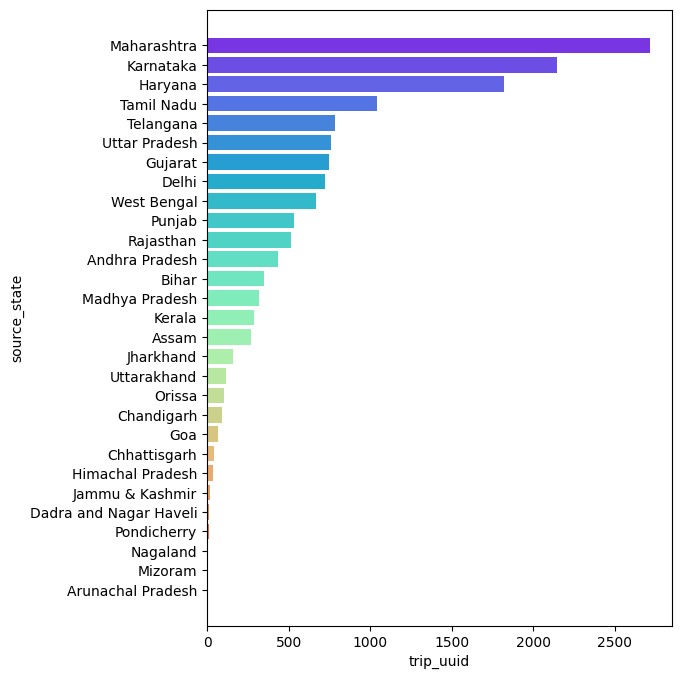

In [311]:
plt.figure(figsize = (6, 8))
sns.barplot(data = trip_source_state, x = trip_source_state['trip_uuid'], y = trip_source_state['source_state'],palette='rainbow')
plt.plot()

In [376]:
trip_destination_state = trip.groupby(by = 'destination_state')['trip_uuid'].count().to_frame().reset_index()
trip_destination_state['percentage'] = np.round(trip_destination_state['trip_uuid'] * 100/ trip_destination_state['trip_uuid'].sum(), 2)
trip_destination_state = trip_destination_state.sort_values(by = 'trip_uuid', ascending = False)
trip_destination_state.head()

,destination_state,trip_uuid,percentage
18,Maharashtra,2561,17.32
15,Karnataka,2294,15.51
11,Haryana,1640,11.09
25,Tamil Nadu,1084,7.33
28,Uttar Pradesh,805,5.44


[]

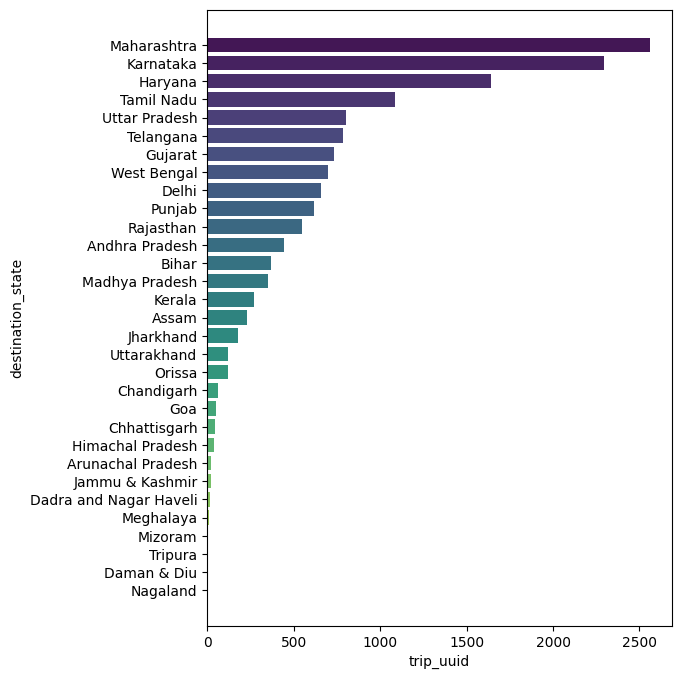

In [399]:
plt.figure(figsize = (6, 8))
sns.barplot(data = trip_destination_state, x = trip_destination_state['trip_uuid'], y = trip_destination_state['destination_state'],palette='viridis')
plt.plot()

In [387]:
trip_source_city = trip.groupby('source_city')['trip_uuid'].count().to_frame().reset_index()
trip_source_city['percentage'] = np.round(trip_source_city['trip_uuid'] * 100/ trip_source_city['trip_uuid'].sum(), 2)
trip_source_city = trip_source_city.sort_values(by = 'trip_uuid', ascending = False)[:10]
trip_source_city

,source_city,trip_uuid,percentage
436,Mumbai,1442,9.75
235,Gurgaon,1154,7.80
167,Delhi,880,5.95
77,Bengaluru,726,4.91
98,Bhiwandi,697,4.71
56,Bangalore,648,4.38
134,Chennai,568,3.84
262,Hyderabad,524,3.54
514,Pune,480,3.25
354,Kolkata,356,2.41


[]

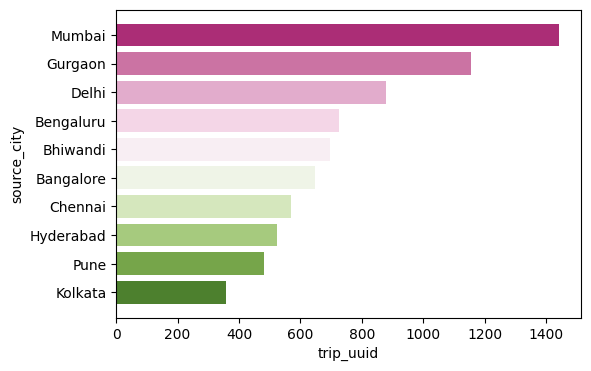

In [390]:
plt.figure(figsize = (6, 4))
sns.barplot(data = trip_source_city, x = trip_source_city['trip_uuid'], y = trip_source_city['source_city'],palette='PiYG')
plt.plot()

In [388]:
trip_destination_city = trip.groupby('destination_city')['trip_uuid'].count().to_frame().reset_index()
trip_destination_city['percentage'] = np.round(trip_destination_city['trip_uuid'] * 100/ trip_destination_city['trip_uuid'].sum(), 2)
trip_destination_city = trip_destination_city.sort_values(by = 'trip_uuid', ascending = False)[:10]
trip_destination_city

,destination_city,trip_uuid,percentage
513,Mumbai,1548,10.47
96,Bengaluru,974,6.59
280,Gurgaon,936,6.33
199,Delhi,783,5.30
163,Chennai,595,4.02
72,Bangalore,551,3.73
305,Hyderabad,503,3.40
115,Bhiwandi,434,2.94
417,Kolkata,384,2.60
158,Chandigarh,339,2.29


[]

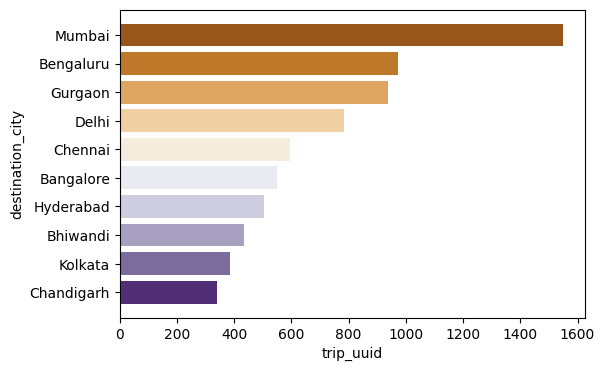

In [392]:
plt.figure(figsize = (6, 4))
sns.barplot(data = trip_destination_city, x = trip_destination_city['trip_uuid'], y = trip_destination_city['destination_city'],palette='PuOr')
plt.plot()

####Hypothesis Testing:
1. Perform hypothesis testing / visual analysis between :

    a. actual_time aggregated value and OSRM time aggregated value.

    b. actual_time aggregated value and segment actual time aggregated value.

    c. OSRM distance aggregated value and segment OSRM distance aggregated value.

    d. OSRM time aggregated value and segment OSRM time aggregated value.

Note: Aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid.

In [312]:
trip[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,14787.000000,14787.000000
mean,356.306012,160.990938
std,561.517936,271.459495
min,9.000000,6.000000
25%,67.000000,29.000000
50%,148.000000,60.000000
75%,367.000000,168.000000
max,6265.000000,2032.000000


[]

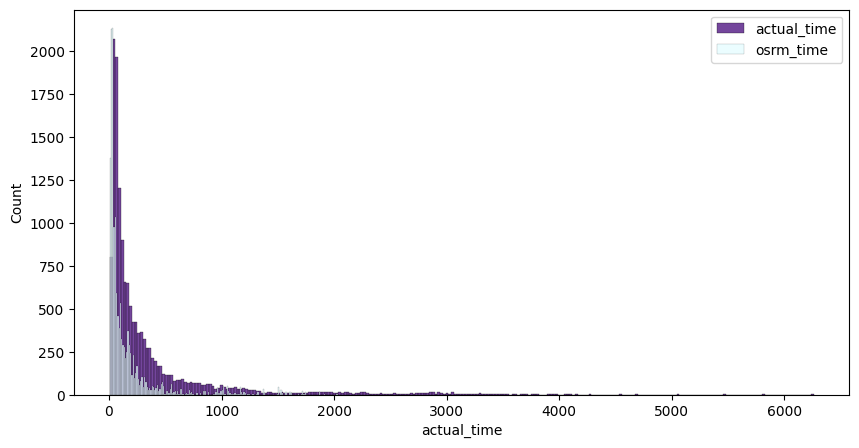

In [400]:
plt.figure(figsize = (10, 5))
sns.histplot(trip['actual_time'], color = '#45087b')
sns.histplot(trip['osrm_time'], color = '#e5fdff')
plt.legend(['actual_time', 'osrm_time'])
plt.plot()

In [314]:
import statsmodels.api as sm

<Figure size 200x200 with 0 Axes>

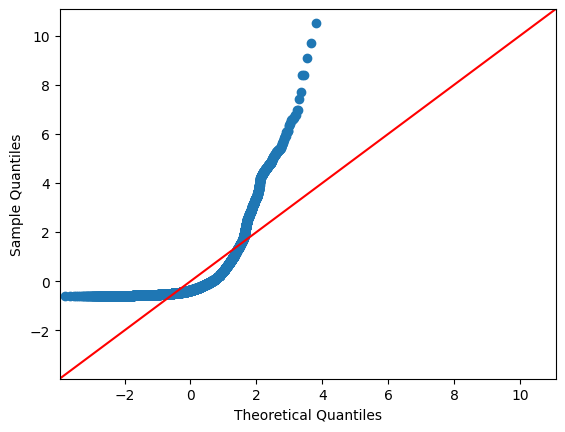

In [315]:
plt.figure(figsize = (2, 2))
sm.qqplot(trip['actual_time'],fit=True,line='45')
plt.show()

<Figure size 200x200 with 0 Axes>

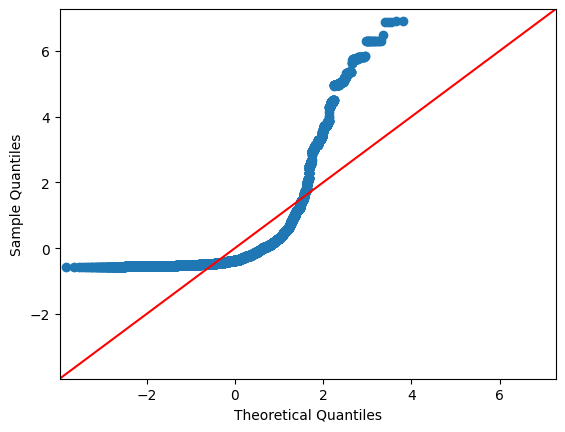

In [316]:
plt.figure(figsize = (2, 2))
sm.qqplot(trip['osrm_time'],fit=True,line='45')
plt.show()

Shapiro Test: (at alpha=0.05)

H0: Actual time follows Normal Distribution

Ha: Actual time does not follow Normal Distribution

In [317]:
tstat,pval=shapiro(trip['actual_time'])
if pval<0.05:
  print("P-value : " ,pval)
  print("Actual time does not follow Normal Distribution")
else:
  print("Actual time follows Normal Distribution")

P-value :  0.0
Actual time does not follow Normal Distribution


H0: osrm time follows Normal Distribution

Ha: osrm time does not follow Normal Distribution

In [318]:
tstat,pval=shapiro(trip['osrm_time'])
if pval<0.05:
  print("P-value : " ,pval)
  print("osrm time does not follow Normal Distribution")
else:
  print("osrm time follows Normal Distribution")

P-value :  0.0
osrm time does not follow Normal Distribution


Levene's test for checking homogeneity:

H0: Actual time and osrm time have homogenous variances

Ha: Actual time and osrm time do not have homogenous variances

In [319]:
tstat,pval=levene(trip['actual_time'],trip['osrm_time'])
if pval<0.05:
  print("P-value : " ,pval)
  print("Actual time and osrm time do not have homogenous variances")
else:
  print("Actual time and osrm time have homogenous variances")

P-value :  8.743536461316657e-219
Actual time and osrm time do not have homogenous variances


Since the data columns do not follow normal distribution, non-parametric test is needed to be used. Using Kruskal Wallis Test to check if actual time and osrm time are similar.


In [320]:
tstat,pval=kruskal(trip['actual_time'],trip['osrm_time'])
if pval<0.05:
  print("P-value : " ,pval)
  print("Actual time and osrm time are significantly different")
else:
  print("Actual time and osrm time are similar")

P-value :  0.0
Actual time and osrm time are significantly different


In [321]:
trip[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14787.000000,14787.000000
mean,356.306012,353.059174
std,561.517936,556.365911
min,9.000000,9.000000
25%,67.000000,66.000000
50%,148.000000,147.000000
75%,367.000000,364.000000
max,6265.000000,6230.000000


[]

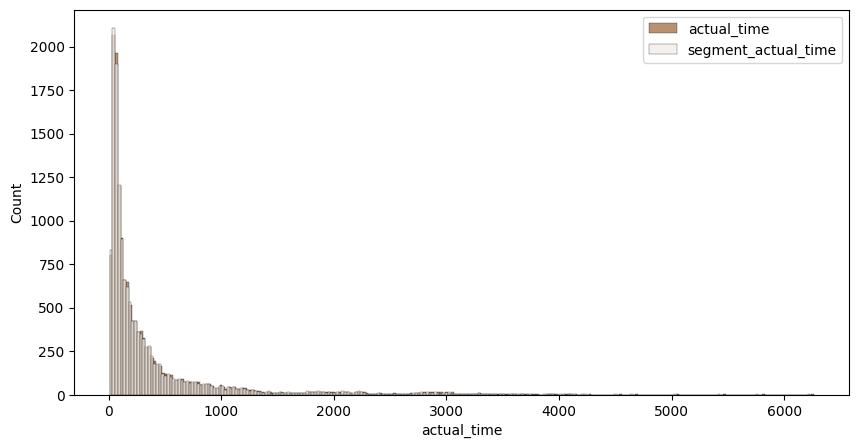

In [401]:
plt.figure(figsize = (10, 5))
sns.histplot(trip['actual_time'], color = '#a16b43')
sns.histplot(trip['segment_actual_time'], color = '#f0ece7')
plt.legend(['actual_time', 'segment_actual_time'])
plt.plot()

<Figure size 200x200 with 0 Axes>

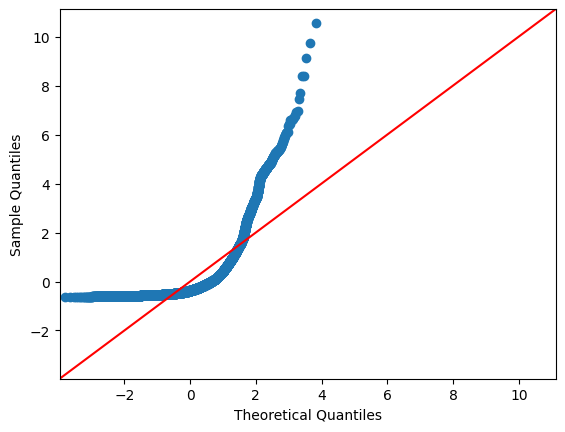

In [403]:
plt.figure(figsize = (2, 2))
sm.qqplot(trip['segment_actual_time'],fit=True,line='45')
plt.show()

Shapiro Test: (at alpha=0.05)

H0: Segment Actual time follows Normal Distribution

Ha: Segment Actual time does not follow Normal Distribution

In [324]:
tstat,pval=shapiro(trip['segment_actual_time'])
if pval<0.05:
  print("P-value : " ,pval)
  print("Segment Actual time does not follow Normal Distribution")
else:
  print("Segment Actual time follows Normal Distribution")

P-value :  0.0
Segment Actual time does not follow Normal Distribution


Levene's test for checking homogeneity:

H0: Actual time and Segment Actual time have homogenous variances

Ha: Actual time and Segment Actual time do not have homogenous variances

In [325]:
tstat,pval=levene(trip['actual_time'],trip['segment_actual_time'])
if pval<0.05:
  print("P-value : " ,pval)
  print("Actual time and Segment Actual time do not have homogenous variances")
else:
  print("Actual time and Segment Actual time have homogenous variances")

Actual time and Segment Actual time have homogenous variances


Since the data columns do not follow normal distribution, non-parametric test is needed to be used. Using Kruskal Wallis Test to check if actual time and segment actual time are similar.


In [326]:
tstat,pval=kruskal(trip['actual_time'],trip['segment_actual_time'])
if pval<0.05:
  print("P-value : " ,pval)
  print("Actual time and Segment Actual time are significantly different")
else:
  print("Actual time and Segment Actual time are similar")

Actual time and Segment Actual time are similar


In [327]:
trip[['osrm_distance', 'segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,14787.000000,14787.000000
mean,203.887411,222.705466
std,370.565564,416.846279
min,9.072900,9.072900
25%,30.756900,32.578850
50%,65.302800,69.784200
75%,206.644200,216.560600
max,2840.081000,3523.632400


[]

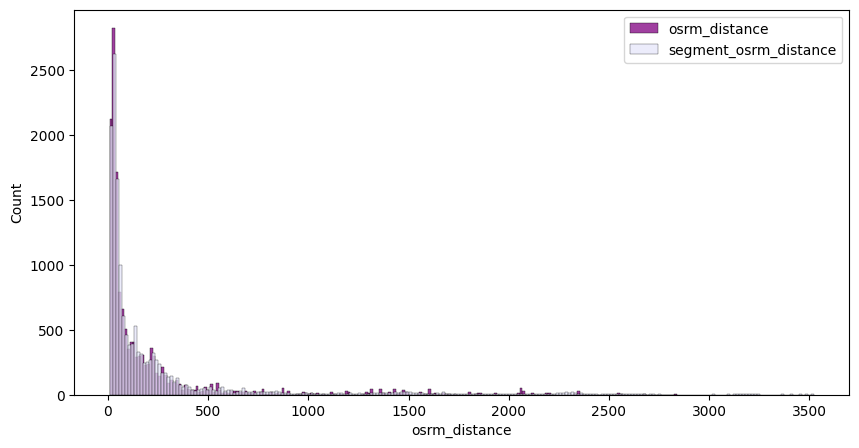

In [404]:
plt.figure(figsize = (10, 5))
sns.histplot(trip['osrm_distance'], color = '#800080')
sns.histplot(trip['segment_osrm_distance'], color = '#e6e6fa')
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.plot()

<Figure size 200x200 with 0 Axes>

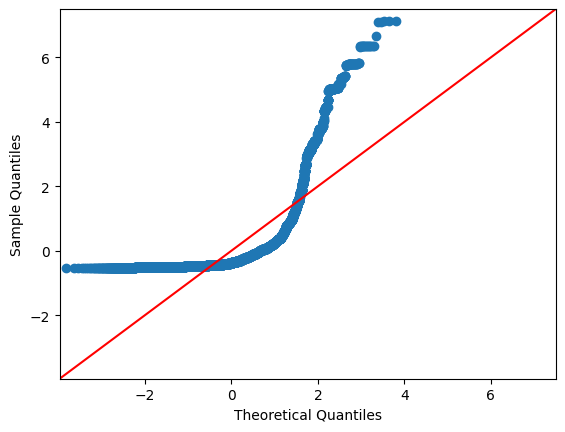

In [329]:
plt.figure(figsize = (2, 2))
sm.qqplot(trip['osrm_distance'],fit=True,line='45')
plt.show()

<Figure size 200x200 with 0 Axes>

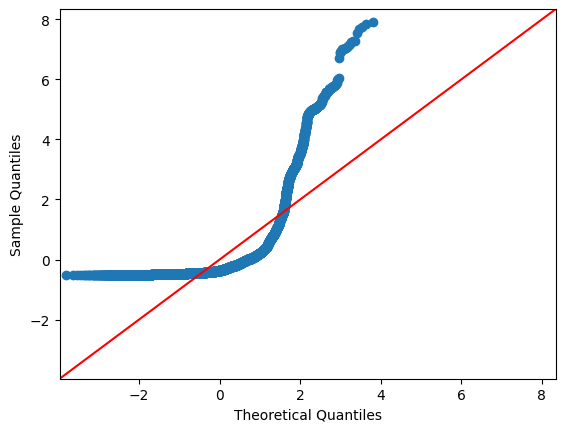

In [330]:
plt.figure(figsize = (2, 2))
sm.qqplot(trip['segment_osrm_distance'],fit=True,line='45')
plt.show()

Shapiro Test: (at alpha=0.05)

H0: osrm distance follows Normal Distribution

Ha: osrm distance does not follow Normal Distribution

In [331]:
tstat,pval=shapiro(trip['osrm_distance'])
if pval<0.05:
  print("P-value : " ,pval)
  print("osrm distance does not follow Normal Distribution")
else:
  print("osrm distance follows Normal Distribution")

P-value :  0.0
osrm distance does not follow Normal Distribution


Shapiro Test: (at alpha=0.05)

H0: segment osrm distance follows Normal Distribution

Ha: segment osrm distance does not follow Normal Distribution

In [332]:
tstat,pval=shapiro(trip['segment_osrm_distance'])
if pval<0.05:
  print("P-value : " ,pval)
  print("Segment osrm distance does not follow Normal Distribution")
else:
  print("Segment osrm distance follows Normal Distribution")

P-value :  0.0
Segment osrm distance does not follow Normal Distribution


Levene's test for checking homogeneity:

H0: osrm distance and segment osrm distance have homogenous variances

Ha: osrm distance and segment osrm distance do not have homogenous variances

In [333]:
tstat,pval=levene(trip['osrm_distance'],trip['segment_osrm_distance'])
if pval<0.05:
  print("P-value : " ,pval)
  print("osrm distance and segment osrm distance do not have homogenous variances")
else:
  print("osrm distance and segment osrm distance have homogenous variances")

P-value :  0.00022171213513990103
osrm distance and segment osrm distance do not have homogenous variances


Since the data columns do not follow normal distribution, non-parametric test is needed to be used. Using Kruskal Wallis Test to check if osrm distance and segment osrm distance are similar.

In [334]:
tstat,pval=kruskal(trip['osrm_distance'],trip['segment_osrm_distance'])
if pval<0.05:
  print("P-value : " ,pval)
  print("osrm distance and segment osrm distance are significantly different")
else:
  print("osrm distance and segment osrm distance are similar")

P-value :  1.0001053043133998e-06
osrm distance and segment osrm distance are significantly different


In [335]:
trip[['osrm_time', 'segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,14787.000000,14787.000000
mean,160.990938,180.511598
std,271.459495,314.679279
min,6.000000,6.000000
25%,29.000000,30.000000
50%,60.000000,65.000000
75%,168.000000,184.000000
max,2032.000000,2564.000000


[]

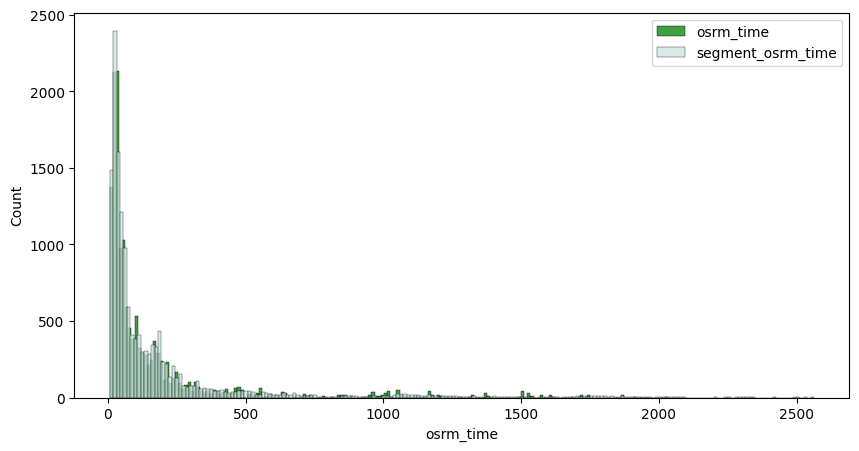

In [405]:
plt.figure(figsize = (10, 5))
sns.histplot(trip['osrm_time'], color = 'green')
sns.histplot(trip['segment_osrm_time'], color = '#cce5e5')
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.plot()

<Figure size 200x200 with 0 Axes>

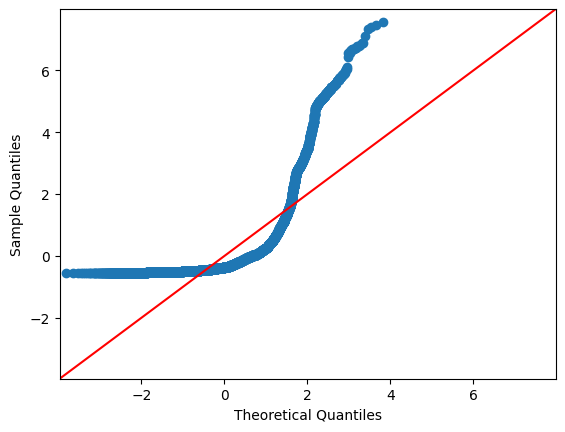

In [337]:
plt.figure(figsize = (2, 2))
sm.qqplot(trip['segment_osrm_time'],fit=True,line='45')
plt.show()

Shapiro Test: (at alpha=0.05)

H0: segment osrm time follows Normal Distribution

Ha: segment osrm time does not follow Normal Distribution

In [338]:
tstat,pval=shapiro(trip['segment_osrm_time'])
if pval<0.05:
  print("P-value : " ,pval)
  print("Segment osrm time does not follow Normal Distribution")
else:
  print("Segment osrm time follows Normal Distribution")

P-value :  0.0
Segment osrm time does not follow Normal Distribution


Levene's test for checking homogeneity:

H0: osrm time and segment osrm time have homogenous variances

Ha: osrm time and segment osrm time do not have homogenous variances

In [339]:
tstat,pval=levene(trip['osrm_time'],trip['segment_osrm_time'])
if pval<0.05:
  print("P-value : " ,pval)
  print("osrm time and segment osrm time do not have homogenous variances")
else:
  print("osrm time and segment osrm time have homogenous variances")

P-value :  9.250556006347759e-08
osrm time and segment osrm time do not have homogenous variances


Since the data columns do not follow normal distribution, non-parametric test is needed to be used. Using Kruskal Wallis Test to check if osrm time and segment osrm time are similar.

In [340]:
tstat,pval=kruskal(trip['osrm_time'],trip['segment_osrm_time'])
if pval<0.05:
  print("P-value : " ,pval)
  print("osrm time and segment osrm time are significantly different")
else:
  print("osrm time and segment osrm time are similar")

P-value :  2.48934342075211e-08
osrm time and segment osrm time are significantly different


In [341]:
numerical_columns = ['od_total_time','segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance','start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance']
trip[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14787.0,530.313468,658.415416,23.460000,149.695000,279.710000,633.535000,7898.550000
segment_actual_time,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_time,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000
segment_osrm_distance,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,160.990938,271.459495,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14787.0,203.887411,370.565564,9.072900,30.756900,65.302800,206.644200,2840.081000


In [393]:
trip_corr = trip[numerical_columns].corr()
trip_corr

,od_total_time,segment_actual_time,segment_osrm_time,segment_osrm_distance,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance
od_total_time,1.000000,0.961582,0.919358,0.920099,0.999999,0.919074,0.961560,0.927416,0.925126
segment_actual_time,0.961582,1.000000,0.953214,0.956293,0.961634,0.952987,0.999989,0.957955,0.958540
segment_osrm_time,0.919358,0.953214,1.000000,0.996098,0.919429,0.987542,0.954044,0.993263,0.991802
segment_osrm_distance,0.920099,0.956293,0.996098,1.000000,0.920191,0.993068,0.957151,0.991624,0.994712
start_scan_to_end_scan,0.999999,0.961634,0.919429,0.920191,1.000000,0.919159,0.961612,0.927471,0.925205
actual_distance_to_destination,0.919074,0.952987,0.987542,0.993068,0.919159,1.000000,0.953920,0.993568,0.997268
actual_time,0.961560,0.999989,0.954044,0.957151,0.961612,0.953920,1.000000,0.958781,0.959398
osrm_time,0.927416,0.957955,0.993263,0.991624,0.927471,0.993568,0.958781,1.000000,0.997588
osrm_distance,0.925126,0.958540,0.991802,0.994712,0.925205,0.997268,0.959398,0.997588,1.000000


[]

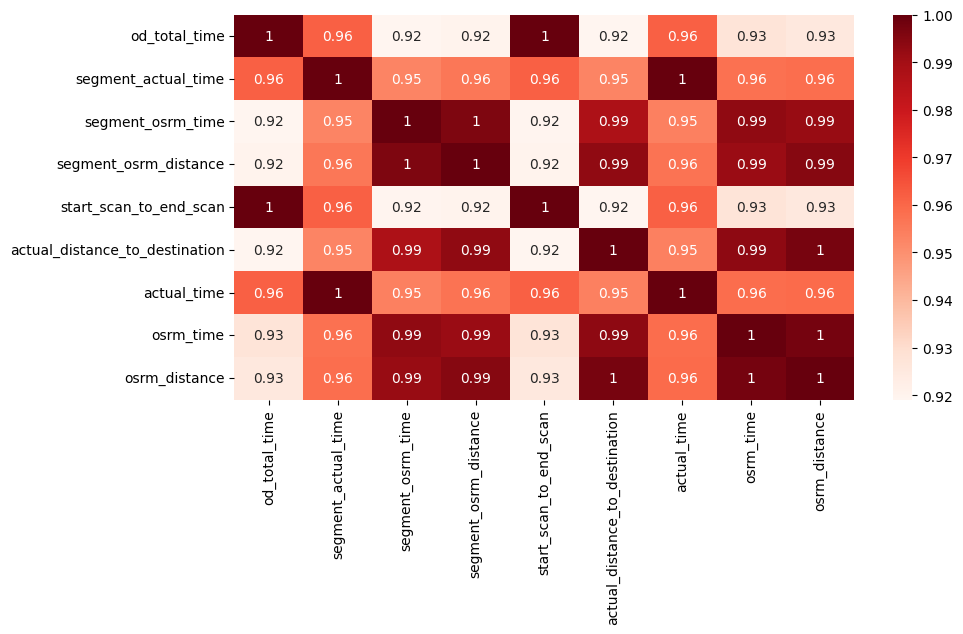

In [398]:
plt.figure(figsize = (10, 5))
sns.heatmap(data = trip_corr, annot = True,cmap='Reds')
plt.plot()

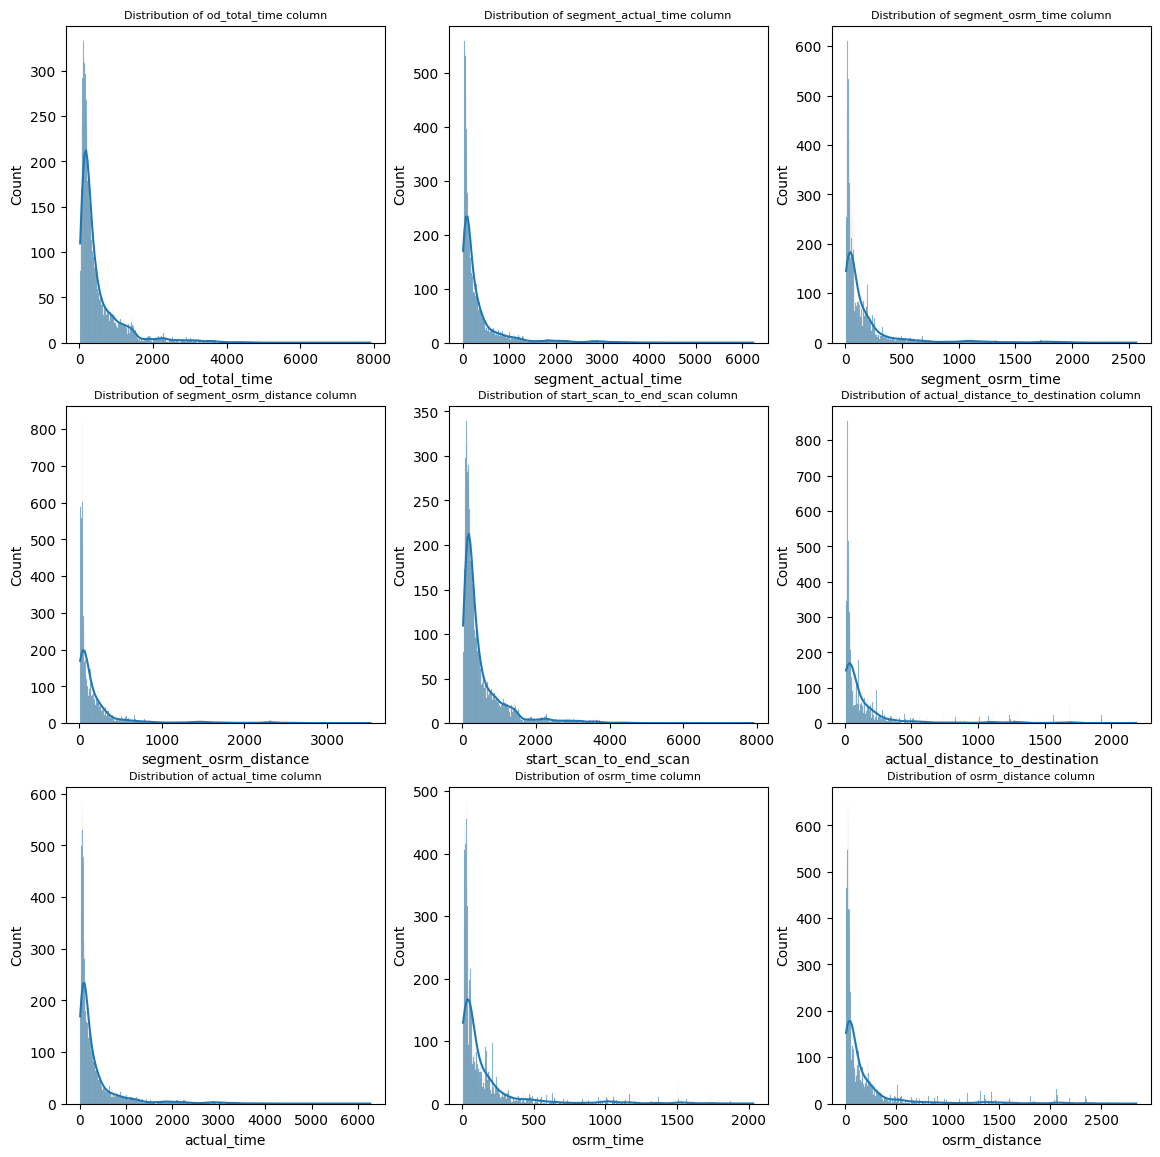

In [406]:
plt.figure(figsize = (14, 14))
for i in range(len(numerical_columns)):
 plt.subplot(3, 3, i + 1)
 sns.histplot(trip[numerical_columns[i]], bins = 1000, kde = True)
 plt.title(f"Distribution of {numerical_columns[i]} column",fontsize=8)
 plt.plot()

####Outlier Detection & Treatment

1.   Find any existing outliers in numerical features.
2.   Visualize the outlier values using Boxplot.
3.   Handle the outliers using the IQR method.

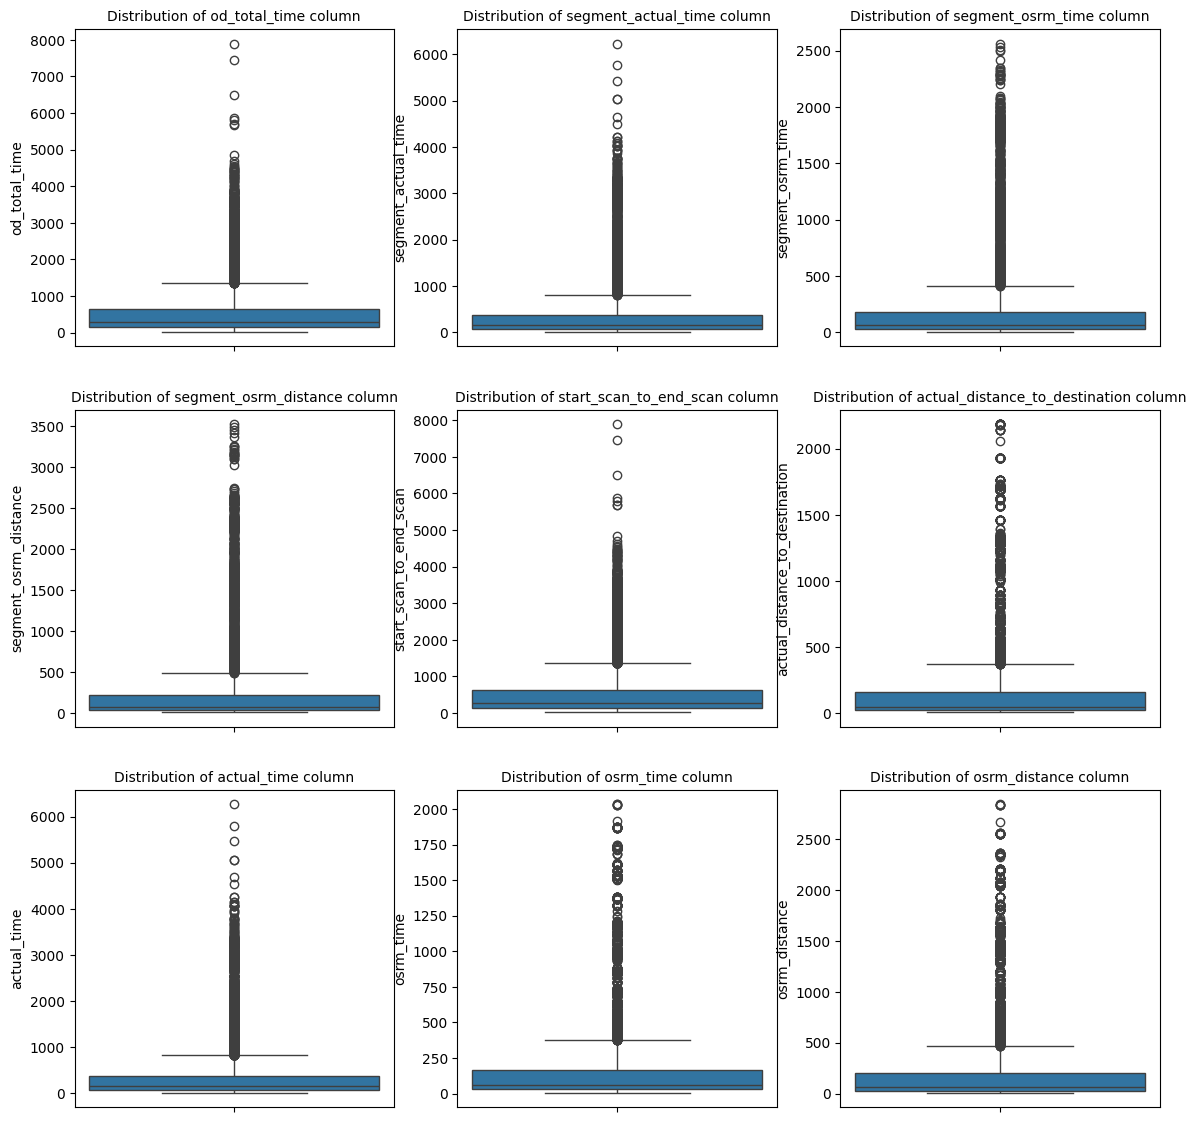

In [343]:
plt.figure(figsize = (14, 14))
for i in range(len(numerical_columns)):
 plt.subplot(3, 3, i + 1)
 sns.boxplot(trip[numerical_columns[i]])
 plt.title(f"Distribution of {numerical_columns[i]} column",fontsize=10)
 plt.plot()

In [344]:
for i in numerical_columns:
  Q1 = np.quantile(trip[i], 0.25)
  Q3 = np.quantile(trip[i], 0.75)
  IQR = Q3 - Q1
  LB = Q1 - 1.5 * IQR
  UB = Q3 + 1.5 * IQR
  outliers = trip.loc[(trip[i] < LB) | (trip[i] > UB)]
  print('Column :', i)
  print(f'Q1 : {Q1}')
  print(f'Q3 : {Q3}')
  print(f'IQR : {IQR}')
  print(f'Lower Boundary : {LB}')
  print(f'Upper Boundary : {UB}')
  print(f'Outlier Count : {outliers.shape[0]}')
  print('*'*100)

Column : od_total_time
Q1 : 149.695
Q3 : 633.535
IQR : 483.84
Lower Boundary : -576.065
Upper Boundary : 1359.295
Outlier Count : 1275
****************************************************************************************************
Column : segment_actual_time
Q1 : 66.0
Q3 : 364.0
IQR : 298.0
Lower Boundary : -381.0
Upper Boundary : 811.0
Outlier Count : 1644
****************************************************************************************************
Column : segment_osrm_time
Q1 : 30.0
Q3 : 184.0
IQR : 154.0
Lower Boundary : -201.0
Upper Boundary : 415.0
Outlier Count : 1485
****************************************************************************************************
Column : segment_osrm_distance
Q1 : 32.57885
Q3 : 216.5606
IQR : 183.98174999999998
Lower Boundary : -243.393775
Upper Boundary : 492.533225
Outlier Count : 1550
****************************************************************************************************
Column : start_scan_to_end_scan
Q1 : 149.

In [345]:
trip = trip[~((trip[numerical_columns] < LB) | (trip[numerical_columns] > UB)).any(axis=1)]
trip = trip.reset_index(drop=True)

In [346]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,od_total_time,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_center,...,source_place,destination_state,destination_city,destination_place,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_week,trip_creation_hour
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,181.61,141.0,65.0,84.1894,IND561203AAB,...,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D,2018-09-12,12,9,2018,37,0
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,100.49,59.0,16.0,19.8766,IND400072AAB,...,unknown_place,Maharashtra,Mumbai,MiraRd_IP,2018-09-12,12,9,2018,37,0
2,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,190.49,60.0,23.0,28.0647,IND600056AAA,...,Poonamallee,Tamil Nadu,Chennai,Poonamallee,2018-09-12,12,9,2018,37,0
3,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,98.01,24.0,13.0,12.0184,IND600044AAD,...,Chrompet_DPC,Tamil Nadu,Chennai,Vandalur_Dc,2018-09-12,12,9,2018,37,0
4,training,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,trip-153671066826362165,146.84,64.0,34.0,28.9203,IND560043AAC,...,HBR Layout PC,Karnataka,Bengaluru,HBR Layout PC,2018-09-12,12,9,2018,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,258.03,82.0,62.0,64.8551,IND160002AAC,...,Mehmdpur_H,Punjab,Chandigarh,Mehmdpur_H,2018-10-03,3,10,2018,40,23
9987,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,60.59,21.0,11.0,16.0883,IND121004AAB,...,Balabhgarh_DPC,Haryana,Faridabad,Blbgarh_DC,2018-10-03,3,10,2018,40,23
9988,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,422.12,281.0,88.0,104.8866,IND208006AAA,...,GovndNgr_DC,Uttar Pradesh,Kanpur,GovndNgr_DC,2018-10-03,3,10,2018,40,23
9989,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,348.52,258.0,221.0,223.5324,IND627005AAA,...,VdkkuSrt_I,Tamil Nadu,Tirchchndr,Shnmgprm_D,2018-10-03,3,10,2018,40,23


In [347]:
trip.shape

(9991, 34)

<Axes: >

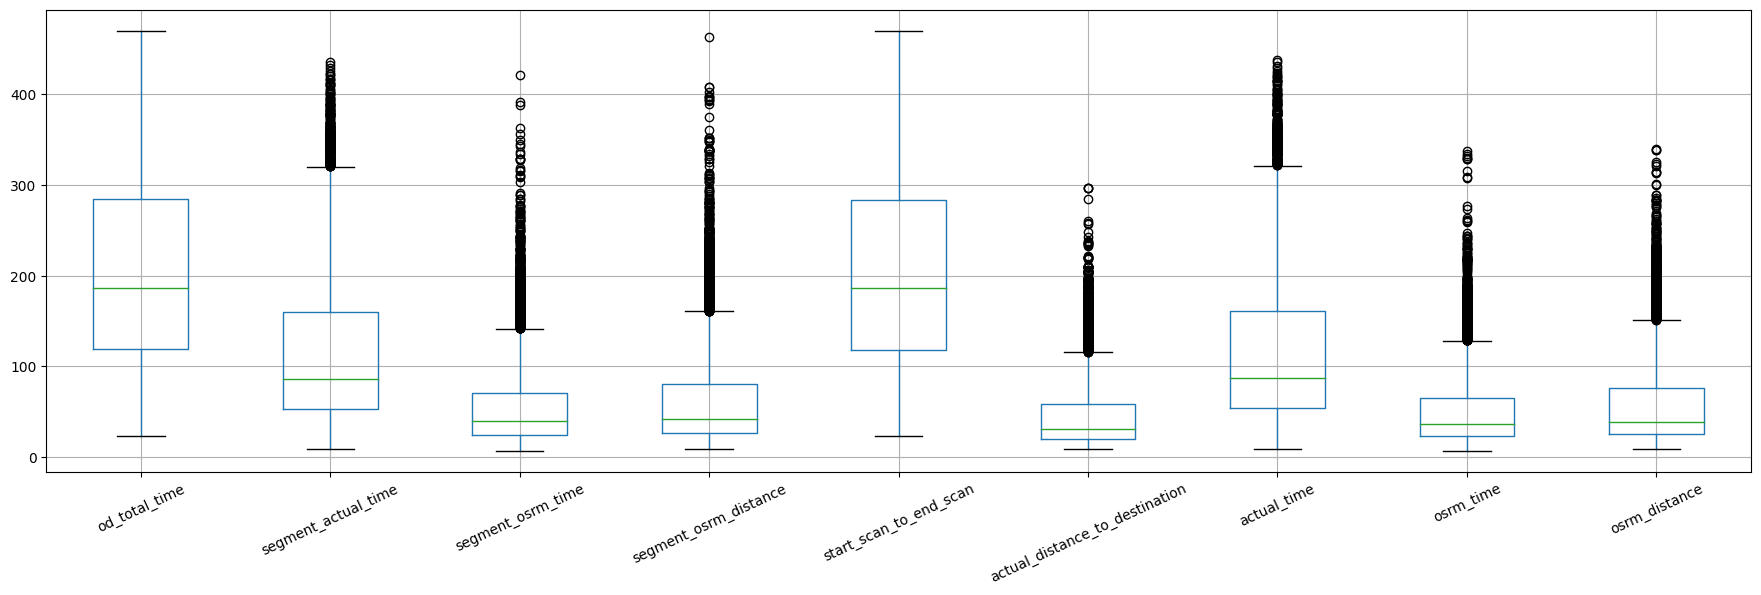

In [348]:
#Post Outlier treatment through IQR method:
trip[numerical_columns].boxplot(rot=25, figsize=(22,6))

####Perform one-hot encoding on categorical features.

There are 2 columns- route_type and data upon which one hot encoding can be done since there are only two unique values within these columns.

In [349]:
trip['route_type'].value_counts()

route_type
Carting    8010
FTL        1981
Name: count, dtype: int64

In [350]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
trip['route_type']= label_encoder.fit_transform(trip['route_type'])

In [351]:
trip['route_type'].value_counts()

route_type
0    8010
1    1981
Name: count, dtype: int64

In [352]:
trip['data'].value_counts()

data
training    7129
test        2862
Name: count, dtype: int64

In [353]:
trip['data']= label_encoder.fit_transform(trip['data'])

In [354]:
trip['data'].value_counts()

data
1    7129
0    2862
Name: count, dtype: int64

####Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [355]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [356]:
standard_scaler = StandardScaler()
standard_scaler.fit(trip[numerical_columns])

StandardScaler()

In [357]:
trip[numerical_columns] = standard_scaler.transform(trip[numerical_columns])

In [358]:
trip[numerical_columns]

,od_total_time,segment_actual_time,segment_osrm_time,segment_osrm_distance,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance
0,-0.239762,0.312631,0.130461,0.350348,-0.248540,0.641634,0.319121,0.366589,0.511736
1,-0.978060,-0.676196,-0.845370,-0.776738,-0.977741,-0.699577,-0.685137,-0.883338,-0.768664
2,-0.158942,-0.664137,-0.705966,-0.633241,-0.166504,-0.521861,-0.661226,-0.694669,-0.604586
3,-1.000631,-1.098256,-0.905115,-0.914454,-0.995971,-0.892929,-1.103578,-0.930505,-0.918592
4,-0.556214,-0.615901,-0.486902,-0.618247,-0.558450,-0.573890,-0.625360,-0.435251,-0.587843
...,...,...,...,...,...,...,...,...,...
9986,0.455760,-0.398842,0.070716,0.011513,0.453317,0.272289,-0.398206,0.225088,0.283800
9987,-1.341202,-1.134433,-0.944945,-0.843128,-1.342341,-0.739361,-1.139445,-0.954088,-0.838951
9988,1.949194,2.000872,0.588504,0.713068,1.948179,-0.184525,1.980930,-0.105081,-0.001107
9989,1.279338,1.723519,3.237187,2.792344,1.273668,2.115149,1.765732,2.984360,2.194631


####Business Insights & Recommendations
*   Patterns observed in the data along with what you can infer from them.
*   Check from where most orders are coming from (State, Corridor, etc.)
*   Busiest corridor, avg distance between them, avg time taken, etc.
*   Actionable items for the business.

Business Insights:

1. There are approximately 14787 unique trip IDs given in the dataset which comprises of just 2 months worth data.
2. Carting is the top route type used.
3. Top 5 Source states from where the trip is created are : Maharashtra, Karnataka, Haryana, Tamil nadu, Telangana. This means that the sellers are majorly based in these states.
4. Bottom source and destination states are majorly from North-East (Arunachal Pradesh, Mizoram etc.)
5. Top 5 destination states where the trip ended are : Maharashtra, Karnataka, Haryana, Tamil nadu, Uttar Pradesh. This means that the customers ordering are majorly based in these states.
6. Top cities sourcing and collecting the orders are Mumbai, Bangalore and NCR regions.
7. Actual time and Segment actual time are similar to each other in the dataset.
8. Actual time and OSRM time are significantly different.
9. OSRM distance and Segment OSRM distance are significantly different.
10. OSRM time and Segment OSRM time are significantly different.
11. Average time taken for each trip to complete is around 5 hours (4.98 hours precisely).

Actionable Items:
1. Central, Easterna nd North-Eastern corridors have significantly less traffic, with very less trips. Delhivery can improve their business and logistics in these areas.
2. Maharashtra and Karnataka have the highest trips, Delhivery can introduce loyalty programs for customer retention. Also, improve the speed of deliveries in these segments since it greatly impacts the revenue of the company.
3. Actual time and OSRM (Open Source Routing Machine) said time are most of the times not matching and are statistically different. The OSRM planning certainly needs improvement.
4. Delhivery agents need to follow OSRM distance which is the most economic instead of deflecting from it that increases the distance as well as time taken.